In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

In [3]:
dfp=pd.read_csv("https://raw.githubusercontent.com/VolkiTheDreamer/dataset/master/Classification/pokemon.csv",usecols=list(range(1,12))) #1-11 kolonlarını alıyoruz, ilk kolon gereksiz
dfp.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [6]:
len(dfp)

800

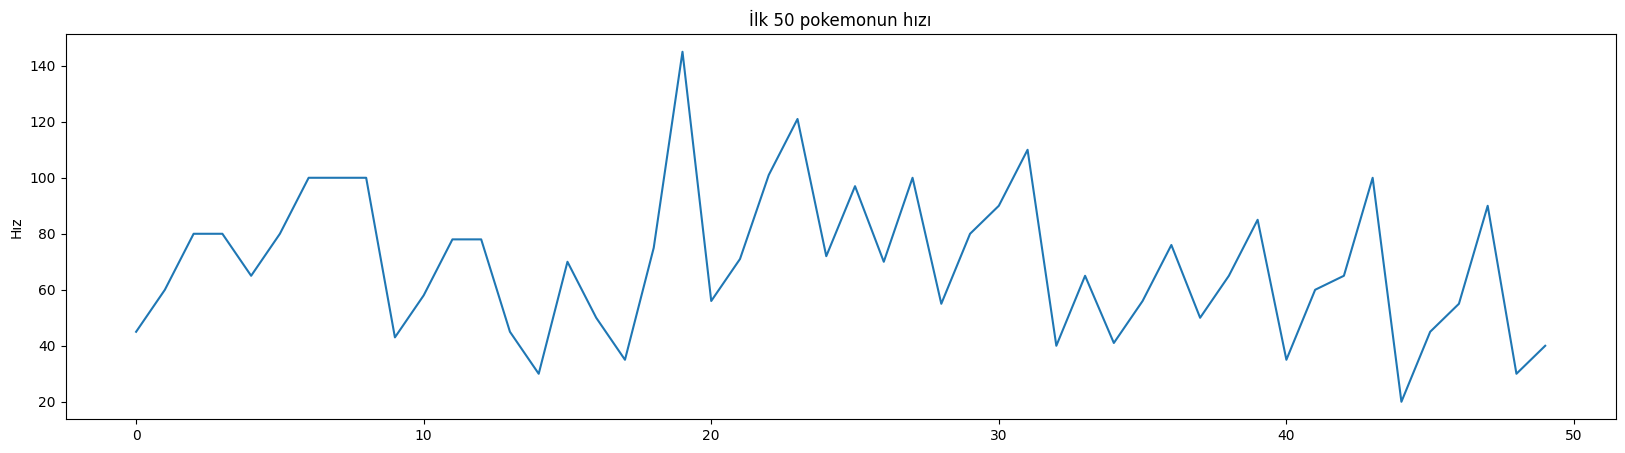

In [7]:
dfp["Speed"].iloc[:50].plot(kind="bar",figsize=(20,5)) #default tür line'dır. bu sırada plt nesnesi oluşur
plt.title("İlk 50 pokemonun hızı")
plt.ylabel("Hız")
plt.show();

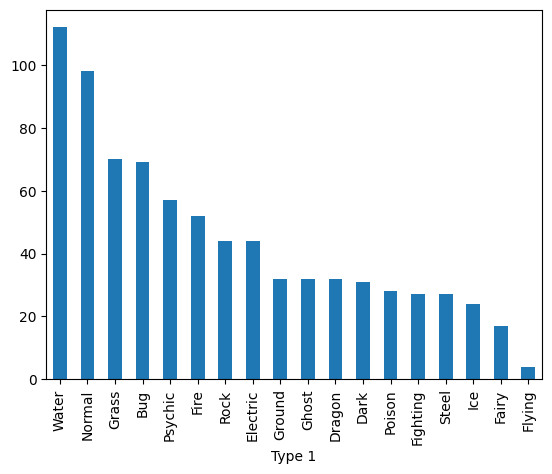

In [8]:
dfp["Type 1"].value_counts().plot(kind="bar")
plt.show();

In [9]:
import seaborn as sns

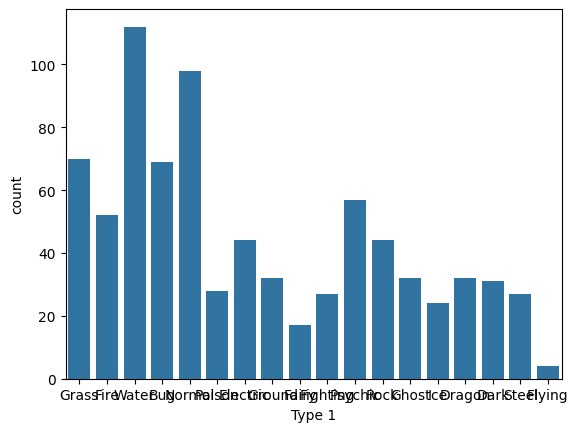

In [10]:
#aynısını seaborn ile yapalım
sns.countplot(x="Type 1",data=dfp)
plt.show();

In [11]:
dfp.groupby("Type 1").count()

,Name,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,,
Bug,69,52,69,69,69,69,69,69,69,69
Dark,31,21,31,31,31,31,31,31,31,31
Dragon,32,21,32,32,32,32,32,32,32,32
Electric,44,17,44,44,44,44,44,44,44,44
Fairy,17,2,17,17,17,17,17,17,17,17
Fighting,26,7,27,27,27,27,27,27,27,27
Fire,52,24,52,52,52,52,52,52,52,52
Flying,4,2,4,4,4,4,4,4,4,4
Ghost,32,22,32,32,32,32,32,32,32,32


In [12]:
dfp.groupby("Type 1").size()

,0
Type 1,
Bug,69
Dark,31
Dragon,32
Electric,44
Fairy,17
Fighting,27
Fire,52
Flying,4
Ghost,32


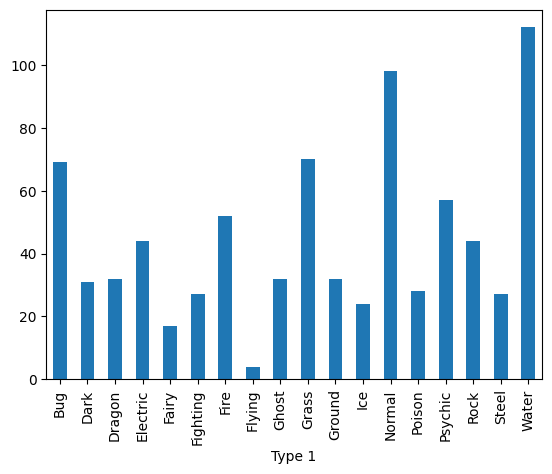

In [13]:
dfp.groupby("Type 1").size().plot(kind="bar")
plt.show();

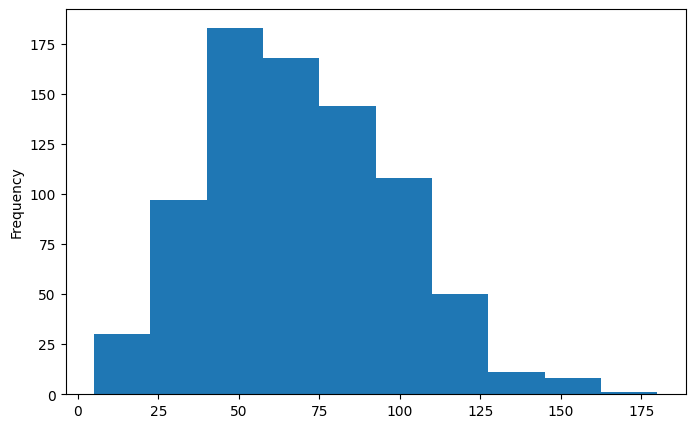

In [14]:
dfp["Speed"].plot(kind="hist",bins=10,figsize=(8,5))
plt.show()

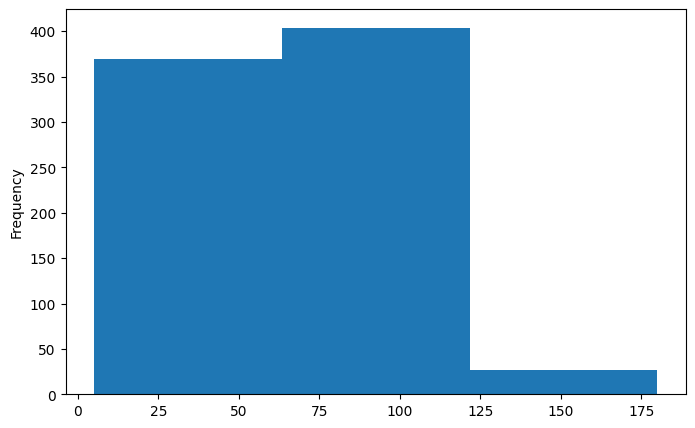

In [17]:
dfp["Speed"].plot(kind="hist",bins=3,figsize=(8,5))
plt.show()

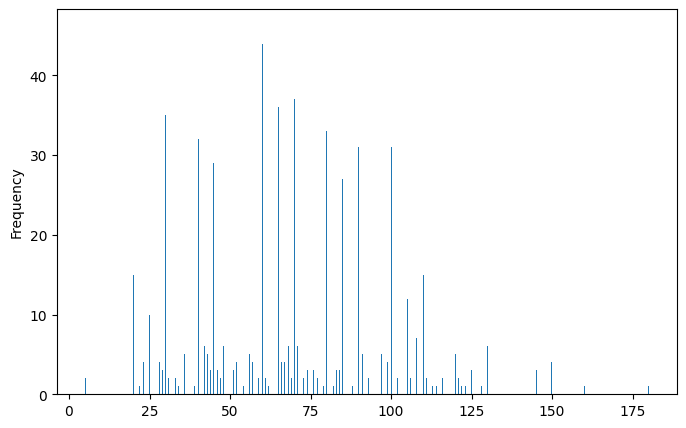

In [18]:
dfp["Speed"].plot(kind="hist",bins=800,figsize=(8,5))
plt.show()

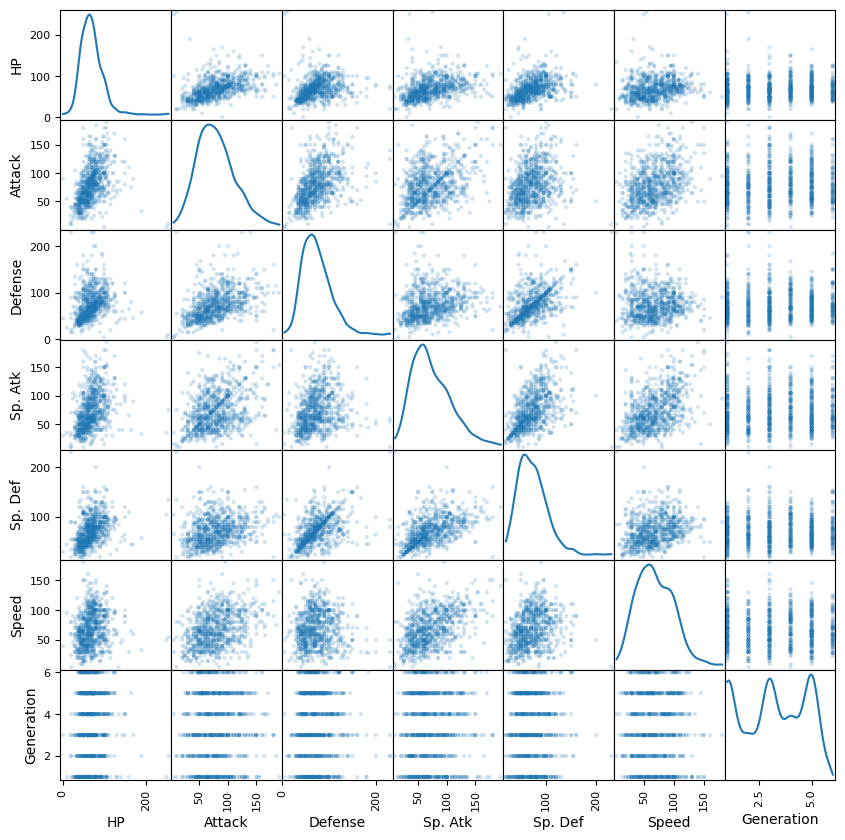

In [19]:
from pandas.plotting import scatter_matrix #diğerlerinden farklı bir
scatter_matrix(dfp.select_dtypes(np.number), alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show();

In [ ]:
#dataframedeki ilk 20 kayıt için Exceldeki combo garfiğe benzer bir grafik çizelim. solda Speed olsun, sağda HP olsun


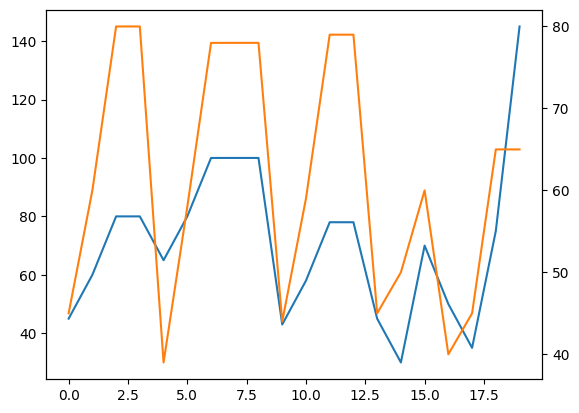

In [21]:
dfp["Speed"].head(20).plot()
dfp["HP"].head(20).plot(secondary_y=True)
plt.show()

/tmp/ipython-input-2886844218.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(dfp["Name"].iloc[:20], rotation=45, ha='right')


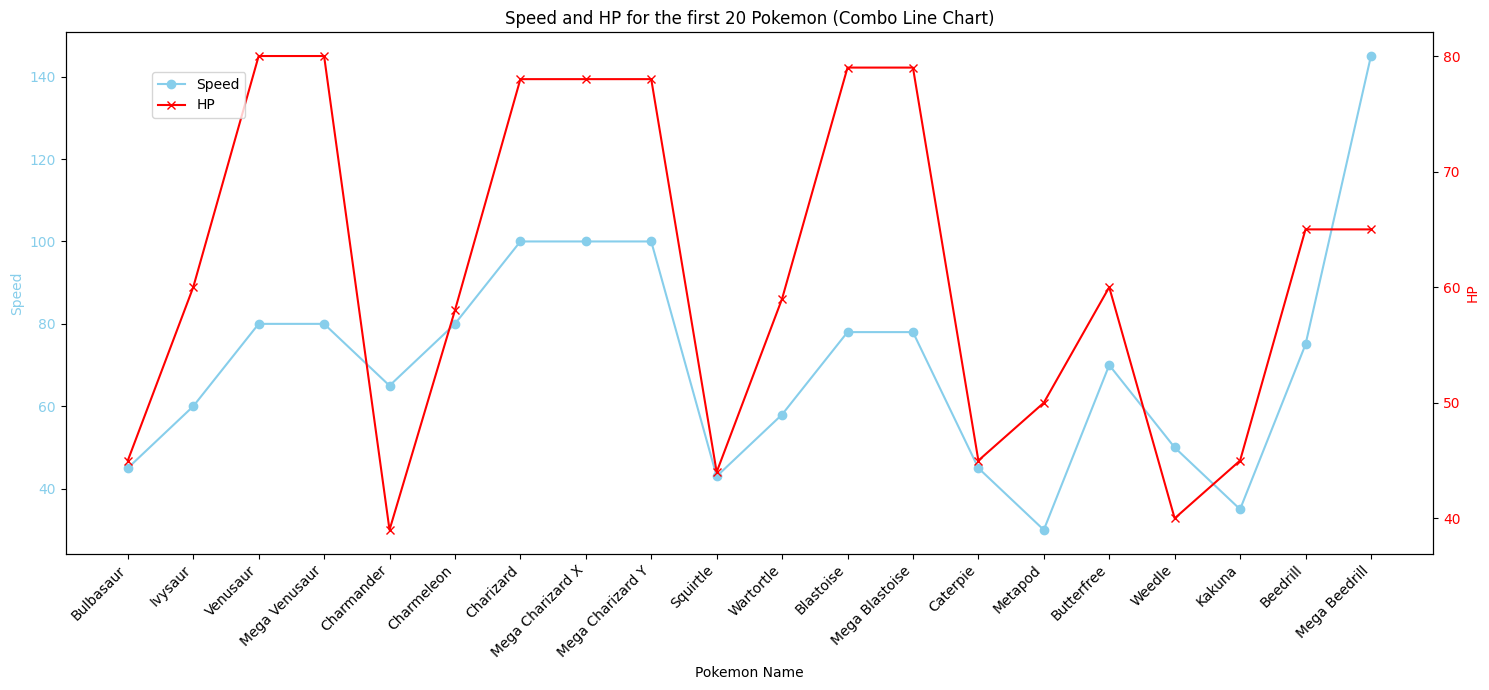

In [25]:
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plot Speed on primary y-axis as a line
ax1.plot(dfp["Name"].iloc[:20], dfp["Speed"].iloc[:20], color='skyblue', label='Speed', marker='o')
ax1.set_xlabel('Pokemon Name')
ax1.set_ylabel('Speed', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticks(range(len(dfp["Name"].iloc[:20]))) # Set tick locations explicitly
ax1.set_xticklabels(dfp["Name"].iloc[:20], rotation=45, ha='right')

# Create a second y-axis for HP
ax2 = ax1.twinx()
ax2.plot(dfp["Name"].iloc[:20], dfp["HP"].iloc[:20], color='red', marker='x', label='HP')
ax2.set_ylabel('HP', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legends
plt.title('Speed and HP for the first 20 Pokemon (Combo Line Chart)')
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

plt.show()

In [31]:
corr = dfp.select_dtypes("number").corr()
corr.loc["Defense","Attack"]

np.float64(0.4386870551184902)

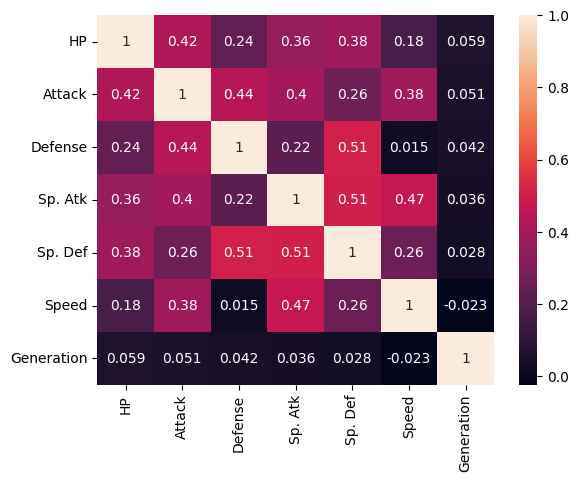

In [30]:
sns.heatmap(dfp.select_dtypes("number").corr(),annot=True);
# plt.show()